# Problem 1
Build a fully connected neural network with multiple hidden layers for the diabetes dataset, which you have done before. The diabetes dataset is available on Canvas. Use as many hidden layers and neurons that you feel proper for this problem. Train it and plot your loss for both training set and validations set, use 20%, and 80% split between your training and validation set. Plot your results and also report your accuracy, precision, recall and F1 score.

In [ ]:
import time
import torch
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Import datasets
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
# File in prof's drive: https://github.com/HamedTabkhi/Intro-to-ML/blob/f5ad98739198799d64a8f9ded959c65de50f4f76/Dataset/diabetes.csv
diabetes = pd.read_csv('/content/drive/MyDrive/Classes/Intro ML/Datasets/diabetes.csv')
diabetes_target = diabetes.pop('Outcome')
print(diabetes.head())

# Data preprocessing, scaling
diabetes_data = StandardScaler().fit_transform(diabetes)

# 80/20 train/test split
np.random.seed(0)
features_train, features_test = train_test_split(diabetes_data, train_size = 0.8, test_size = 0.2, random_state = 42)
target_train, target_test = train_test_split(diabetes_target, train_size = 0.8, test_size = 0.2, random_state = 42)

# Convert data to PyTorch tensors
features_train_tensor = torch.tensor(features_train, dtype=torch.float32)
target_train_tensor = torch.tensor(target_train.values, dtype=torch.float32).reshape(-1, 1) # Reshape for compatibility with nn.Linear output
features_test_tensor = torch.tensor(features_test, dtype=torch.float32)
target_test_tensor = torch.tensor(target_test.values, dtype=torch.float32).reshape(-1, 1) # Reshape for compatibility


Mounted at /content/drive
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33  


In [ ]:
epochs = 3000
learning_rate = 0.001
input_features = features_train.shape[1]

class NN(nn.Module):
    def __init__(self):
        super().__init__()
        self.relu = nn.ReLU()
        self.fc1 = nn.Linear(input_features, 40)
        self.fc2 = nn.LazyLinear(333)
        self.fc3 = nn.LazyLinear(1)
    def forward(self, x):
        # Run data through fully connected layers
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

diabetes_net = NN()
criterion = nn.MSELoss()
optimizer = optim.SGD(diabetes_net.parameters(), lr=learning_rate)

# Training loop
start_time = time.time()
train_loss_hist = []
valid_loss_hist = []
for epoch in range(epochs):
    y_pred = diabetes_net(features_train_tensor)
    loss = criterion(y_pred, target_train_tensor)
    train_loss_hist.append(loss.item())
    valid_loss_hist.append(criterion(diabetes_net(features_test_tensor), target_test_tensor).item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
end_time = time.time()
training_time = end_time - start_time

# Round prediction outputs into classifications
target_arr = np.array(target_test_tensor)
pred_arr = MinMaxScaler().fit_transform(diabetes_net(features_test_tensor).detach().numpy())
pred_arr = torch.round(torch.from_numpy(pred_arr))

Training time:  4.845564603805542
Final training loss:  0.15931972861289978
Final validation loss:  0.16617900133132935
Evaluation Accuracy:  0.7467532467532467
Evaluation Precision:  0.6818181818181818
Evaluation Recall:  0.5454545454545454
Evaluation F1:  0.6060606060606061


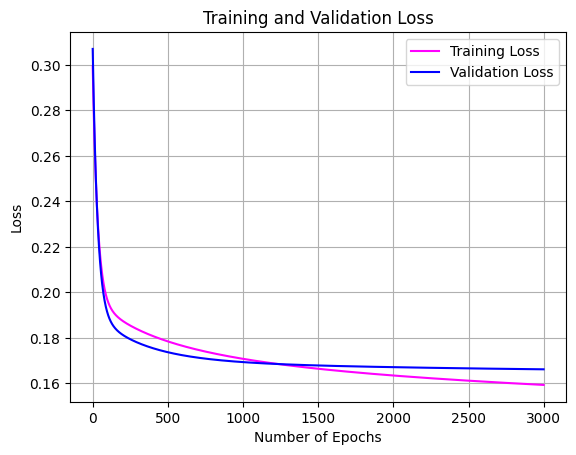

In [ ]:
# Evaluate model performance
accuracy = accuracy_score(target_arr, pred_arr)
precision = precision_score(target_arr, pred_arr)
recall = recall_score(target_arr, pred_arr)
f1 = f1_score(target_arr, pred_arr)

# Print results
print("Training time: ", training_time)
print("Final training loss: ", train_loss_hist[-1])
print("Final validation loss: ", valid_loss_hist[-1])
print("Evaluation Accuracy: ", accuracy)
print("Evaluation Precision: ", precision)
print("Evaluation Recall: ", recall)
print("Evaluation F1: ", f1)

# Plot loss
plt.clf()
plt.plot(range(epochs), train_loss_hist, color="magenta", label="Training Loss")
plt.plot(range(epochs), valid_loss_hist, color="blue", label="Validation Loss")
plt.legend()
plt.rcParams["figure.figsize"] = (10,5)
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.grid(True)
plt.show()

# Problem 2
Build a fully connected neural network with multiple hidden layers for the Cancer dataset, which you have done before. The cancer dataset is available on Canvas. Use as many hidden layers and neurons that you feel proper for this problem. Train it and plot your loss for both training set and validations set, use 20%, and 80% split between your training and validation set. Plot your results and report your accuracy, precision, recall and F1 score. Compare your results against logistic dataset and support vector machine.

In [ ]:
import time
import torch
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Import cancer dataset
cancer_data = pd.DataFrame(np.concatenate([pd.DataFrame(datasets.load_breast_cancer().data), np.reshape(pd.DataFrame(datasets.load_breast_cancer().target),(569,1))],axis=1))
cancer_data.columns = np.append(datasets.load_breast_cancer().feature_names ,'label')
cancer_label = cancer_data.pop('label')
cancer_data = StandardScaler().fit_transform(cancer_data)

# 80/20 train/test split
np.random.seed(0)
features_train, features_test = train_test_split(cancer_data, train_size = 0.8, test_size = 0.2, random_state = 42)
target_train, target_test = train_test_split(cancer_label, train_size = 0.8, test_size = 0.2, random_state = 42)

# Convert data to PyTorch tensors
features_train_tensor = torch.tensor(features_train, dtype=torch.float32)
target_train_tensor = torch.tensor(target_train.values, dtype=torch.float32).reshape(-1, 1) # Reshape for compatibility with nn.Linear output
features_test_tensor = torch.tensor(features_test, dtype=torch.float32)
target_test_tensor = torch.tensor(target_test.values, dtype=torch.float32).reshape(-1, 1) # Reshape for compatibility

In [ ]:
epochs = 2000
learning_rate = 0.001
input_features = features_train.shape[1]

class NN(nn.Module):
    def __init__(self):
        super().__init__()
        self.relu = nn.ReLU()
        self.fc1 = nn.Linear(input_features, 40)
        self.fc2 = nn.LazyLinear(1000)
        self.fc3 = nn.LazyLinear(1)
    def forward(self, x):
        # Run data through fully connected layers
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

cancer_net = NN()
criterion = nn.MSELoss()
optimizer = optim.SGD(cancer_net.parameters(), lr=learning_rate)

# Training loop
start_time = time.time()
train_loss_hist = []
valid_loss_hist = []
for epoch in range(epochs):
    y_pred = cancer_net(features_train_tensor)
    loss = criterion(y_pred, target_train_tensor)
    train_loss_hist.append(loss.item())
    valid_loss_hist.append(criterion(cancer_net(features_test_tensor), target_test_tensor).item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
end_time = time.time()
training_time = end_time - start_time

# Round prediction outputs into classifications
target_arr = np.array(target_test_tensor)
pred_arr = MinMaxScaler().fit_transform(cancer_net(features_test_tensor).detach().numpy())
pred_arr = torch.round(torch.from_numpy(pred_arr))

Training time:  3.54595947265625
Final training loss:  0.04849791154265404
Final validation loss:  0.04982556402683258
Evaluation Accuracy:  0.9473684210526315
Evaluation Precision:  0.9333333333333333
Evaluation Recall:  0.9859154929577465
Evaluation F1:  0.958904109589041


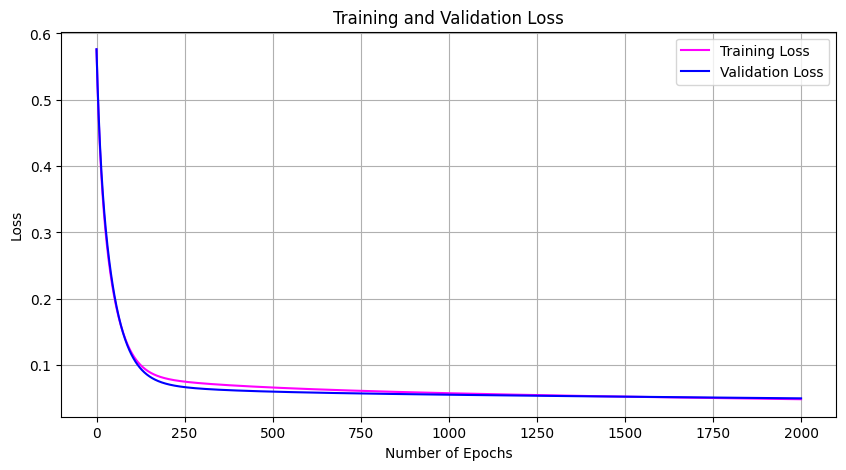

In [ ]:
# Evaluate model performance
accuracy = accuracy_score(target_arr, pred_arr)
precision = precision_score(target_arr, pred_arr)
recall = recall_score(target_arr, pred_arr)
f1 = f1_score(target_arr, pred_arr)

# Print results
print("Training time: ", training_time)
print("Final training loss: ", train_loss_hist[-1])
print("Final validation loss: ", valid_loss_hist[-1])
print("Evaluation Accuracy: ", accuracy)
print("Evaluation Precision: ", precision)
print("Evaluation Recall: ", recall)
print("Evaluation F1: ", f1)

# Plot loss
plt.clf()
plt.plot(range(epochs), train_loss_hist, color="magenta", label="Training Loss")
plt.plot(range(epochs), valid_loss_hist, color="blue", label="Validation Loss")
plt.legend()
plt.rcParams["figure.figsize"] = (10,5)
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.grid(True)
plt.show()

# Problem 3a
Create a fully connected Neural Network for all 10 classes in CIFAR-10 with only one hidden layer with the size of 512. Train your network (Do as many epochs as you need). Report your training time, training loss and evaluation accuracy after each epoch.

In [ ]:
import torch
print("GPU available:", torch.cuda.is_available())
print("GPU name:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "None")

GPU available: True
GPU name: NVIDIA A100-SXM4-80GB


In [ ]:
import time
import torch
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from torchvision import datasets
from torchvision import transforms

# Import dataset
to_tensor = transforms.ToTensor()
data_path = '../'
cifar10_train = datasets.CIFAR10(data_path, train=True, download=True, transform=transforms.ToTensor())
cifar10_val = datasets.CIFAR10(data_path, train=False, download=True, transform=transforms.ToTensor())

# Transform dataset to make it usable
training_images = torch.stack([img for img, label in cifar10_train], dim=3)
mean_train = training_images.view(3, -1).mean(dim=1)
std_train = training_images.view(3, -1).std(dim=1)
data_train = datasets.CIFAR10(data_path, train=True, download=False, transform=transforms.Compose([ \
    transforms.ToTensor(),
    transforms.Normalize(mean_train, std_train)
]))
validation_images = torch.stack([img for img, label in cifar10_val], dim=3)
mean_val = validation_images.view(3, -1).mean(dim=1)
std_val = validation_images.view(3, -1).std(dim=1)
data_val = datasets.CIFAR10(data_path, train=True, download=False, transform=transforms.Compose([ \
    transforms.ToTensor(),
    transforms.Normalize(mean_val, std_val)
]))


In [ ]:
epochs = 100
learning_rate = 1e-2
input_features = 3 * 32 * 32
output_features = 10

# Construct model
model = nn.Sequential(
    nn.Linear(input_features, 512),
    nn.Tanh(),
    nn.Linear(512, output_features)
)

loss_function = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

train_loader = torch.utils.data.DataLoader(data_train, batch_size=64, shuffle=True)
val_loader = torch.utils.data.DataLoader(data_val, batch_size=64, shuffle=True)

print(torch.cuda.is_available())
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
model.to(device)

# Training loop
start_time = time.time()
train_loss_hist = []
eval_accuracy_hist = []
loss = 0.0
eval_accuracy = 0.0
for epoch in range(epochs):
    # Train
    for imgs, label in train_loader:
        imgs, label = imgs.to(device), label.to(device)
        batch_size = imgs.shape[0]
        out = model(imgs.view(batch_size, -1))
        loss = loss_function(out, label)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Evaluate performance
    with torch.no_grad():
        correct = 0
        total = 0
        for imgs, label in val_loader:
            imgs, label = imgs.to(device), label.to(device)
            batch_size = imgs.shape[0]
            outputs = model(imgs.view(batch_size, -1))
            j, predicted = torch.max(outputs, dim=1)
            total += label.shape[0]
            correct += int((predicted == label).sum())
        eval_accuracy = correct / total

    eval_accuracy_hist.append(eval_accuracy)
    train_loss_hist.append(loss.item())

    print("Epoch: ", epoch, "Training Loss: ", train_loss_hist[-1], "Validation Accuracy: ", eval_accuracy_hist[-1])
training_time = time.time() - start_time
print("Training time: ", training_time)

True
cuda
Epoch:  0 Training Loss:  1.6622458696365356 Validation Accuracy:  0.40646
Epoch:  1 Training Loss:  1.9695208072662354 Validation Accuracy:  0.4357
Epoch:  2 Training Loss:  1.3971538543701172 Validation Accuracy:  0.45584
Epoch:  3 Training Loss:  2.097379684448242 Validation Accuracy:  0.46824
Epoch:  4 Training Loss:  1.1184014081954956 Validation Accuracy:  0.48544
Epoch:  5 Training Loss:  2.145610809326172 Validation Accuracy:  0.49788
Epoch:  6 Training Loss:  1.2188833951950073 Validation Accuracy:  0.5116
Epoch:  7 Training Loss:  1.6198267936706543 Validation Accuracy:  0.5231
Epoch:  8 Training Loss:  1.274549961090088 Validation Accuracy:  0.53528
Epoch:  9 Training Loss:  1.135249137878418 Validation Accuracy:  0.55092
Epoch:  10 Training Loss:  1.4795172214508057 Validation Accuracy:  0.55302
Epoch:  11 Training Loss:  0.9270669221878052 Validation Accuracy:  0.57736
Epoch:  12 Training Loss:  1.5293879508972168 Validation Accuracy:  0.5857
Epoch:  13 Training 

# Problem 3b
Extend your network with two more additional hidden layers, like the example we did in lecture. Train your network for 300 epochs. Report your training time, loss, and evaluation accuracy after 300 epochs. Analyze your results in your report and compare your model size and accuracy over the baseline implementation in Problem1

In [ ]:
import time
import torch
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from torchvision import datasets
from torchvision import transforms

# Import dataset
to_tensor = transforms.ToTensor()
data_path = '../'
cifar10_train = datasets.CIFAR10(data_path, train=True, download=True, transform=transforms.ToTensor())
cifar10_val = datasets.CIFAR10(data_path, train=False, download=True, transform=transforms.ToTensor())

# Transform dataset to make it usable
training_images = torch.stack([img for img, label in cifar10_train], dim=3)
mean_train = training_images.view(3, -1).mean(dim=1)
std_train = training_images.view(3, -1).std(dim=1)
data_train = datasets.CIFAR10(data_path, train=True, download=False, transform=transforms.Compose([ \
    transforms.ToTensor(),
    transforms.Normalize(mean_train, std_train)
]))
validation_images = torch.stack([img for img, label in cifar10_val], dim=3)
mean_val = validation_images.view(3, -1).mean(dim=1)
std_val = validation_images.view(3, -1).std(dim=1)
data_val = datasets.CIFAR10(data_path, train=True, download=False, transform=transforms.Compose([ \
    transforms.ToTensor(),
    transforms.Normalize(mean_val, std_val)
]))


In [ ]:
epochs = 300
learning_rate = 1e-2
input_features = 3 * 32 * 32
output_features = 10

# Construct model
model = nn.Sequential(
    nn.Linear(input_features, 512),
    nn.Tanh(),
    nn.Linear(512, 64),
    nn.Tanh(),
    nn.Linear(64, 32),
    nn.Tanh(),
    nn.Linear(32, output_features)
)

loss_function = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

train_loader = torch.utils.data.DataLoader(data_train, batch_size=64, shuffle=True)
val_loader = torch.utils.data.DataLoader(data_val, batch_size=64, shuffle=True)

print(torch.cuda.is_available())
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
model.to(device)

# Training loop
start_time = time.time()
train_loss_hist = []
eval_accuracy_hist = []
loss = 0.0
eval_accuracy = 0.0
for epoch in range(epochs):
    # Train
    for imgs, label in train_loader:
        imgs, label = imgs.to(device), label.to(device)
        batch_size = imgs.shape[0]
        out = model(imgs.view(batch_size, -1))
        loss = loss_function(out, label)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Evaluate performance
    with torch.no_grad():
        correct = 0
        total = 0
        for imgs, label in val_loader:
            imgs, label = imgs.to(device), label.to(device)
            batch_size = imgs.shape[0]
            outputs = model(imgs.view(batch_size, -1))
            j, predicted = torch.max(outputs, dim=1)
            total += label.shape[0]
            correct += int((predicted == label).sum())
        eval_accuracy = correct / total

    eval_accuracy_hist.append(eval_accuracy)
    train_loss_hist.append(loss.item())

    print("Epoch: ", epoch, "Training Loss: ", train_loss_hist[-1], "Validation Accuracy: ", eval_accuracy_hist[-1])
training_time = time.time() - start_time
print("Training time: ", training_time)

True
cuda
Epoch:  0 Training Loss:  1.8750075101852417 Validation Accuracy:  0.36038
Epoch:  1 Training Loss:  1.6581660509109497 Validation Accuracy:  0.38566
Epoch:  2 Training Loss:  1.6645907163619995 Validation Accuracy:  0.41734
Epoch:  3 Training Loss:  1.9115015268325806 Validation Accuracy:  0.43824
Epoch:  4 Training Loss:  1.4556219577789307 Validation Accuracy:  0.44824
Epoch:  5 Training Loss:  1.5683174133300781 Validation Accuracy:  0.46158
Epoch:  6 Training Loss:  2.1896347999572754 Validation Accuracy:  0.47866
Epoch:  7 Training Loss:  1.2973239421844482 Validation Accuracy:  0.49632
Epoch:  8 Training Loss:  1.3886802196502686 Validation Accuracy:  0.50112
Epoch:  9 Training Loss:  1.3220349550247192 Validation Accuracy:  0.52708
Epoch:  10 Training Loss:  1.2046141624450684 Validation Accuracy:  0.53258
Epoch:  11 Training Loss:  1.0232481956481934 Validation Accuracy:  0.55532
Epoch:  12 Training Loss:  1.3763818740844727 Validation Accuracy:  0.5591
Epoch:  13 Tr